In [2]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [3]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(True),
            nn.Linear(hidden_dim, latent_dim),
            nn.ReLU(True)
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(True),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()  # or nn.ReLU(True) depending on the output range
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [4]:
# Simulated LOB data (example)
# Should replace this with actual LOB data
num_samples = 1000
input_dim = 40  # Example input dimension for 10 price levels with bid and ask prices and volumes
lob_data = np.random.rand(num_samples, input_dim)

# Convert to PyTorch tensor
lob_tensor = torch.tensor(lob_data, dtype=torch.float32)

# Create DataLoader
batch_size = 64
dataset = TensorDataset(lob_tensor, lob_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [5]:
# Hyperparameters
hidden_dim = 20
latent_dim = 10
num_epochs = 50
learning_rate = 0.001

# Model, Loss, Optimizer
model = Autoencoder(input_dim, hidden_dim, latent_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    for data in dataloader:
        inputs, _ = data
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/50], Loss: 0.0829
Epoch [2/50], Loss: 0.0843
Epoch [3/50], Loss: 0.0821
Epoch [4/50], Loss: 0.0833
Epoch [5/50], Loss: 0.0815
Epoch [6/50], Loss: 0.0812
Epoch [7/50], Loss: 0.0817
Epoch [8/50], Loss: 0.0810
Epoch [9/50], Loss: 0.0809
Epoch [10/50], Loss: 0.0813
Epoch [11/50], Loss: 0.0775
Epoch [12/50], Loss: 0.0786
Epoch [13/50], Loss: 0.0798
Epoch [14/50], Loss: 0.0783
Epoch [15/50], Loss: 0.0777
Epoch [16/50], Loss: 0.0780
Epoch [17/50], Loss: 0.0739
Epoch [18/50], Loss: 0.0746
Epoch [19/50], Loss: 0.0758
Epoch [20/50], Loss: 0.0742
Epoch [21/50], Loss: 0.0754
Epoch [22/50], Loss: 0.0728
Epoch [23/50], Loss: 0.0726
Epoch [24/50], Loss: 0.0721
Epoch [25/50], Loss: 0.0718
Epoch [26/50], Loss: 0.0694
Epoch [27/50], Loss: 0.0734
Epoch [28/50], Loss: 0.0717
Epoch [29/50], Loss: 0.0698
Epoch [30/50], Loss: 0.0716
Epoch [31/50], Loss: 0.0700
Epoch [32/50], Loss: 0.0711
Epoch [33/50], Loss: 0.0718
Epoch [34/50], Loss: 0.0690
Epoch [35/50], Loss: 0.0689
Epoch [36/50], Loss: 0.0689
E

Mean Squared Error: 0.0669


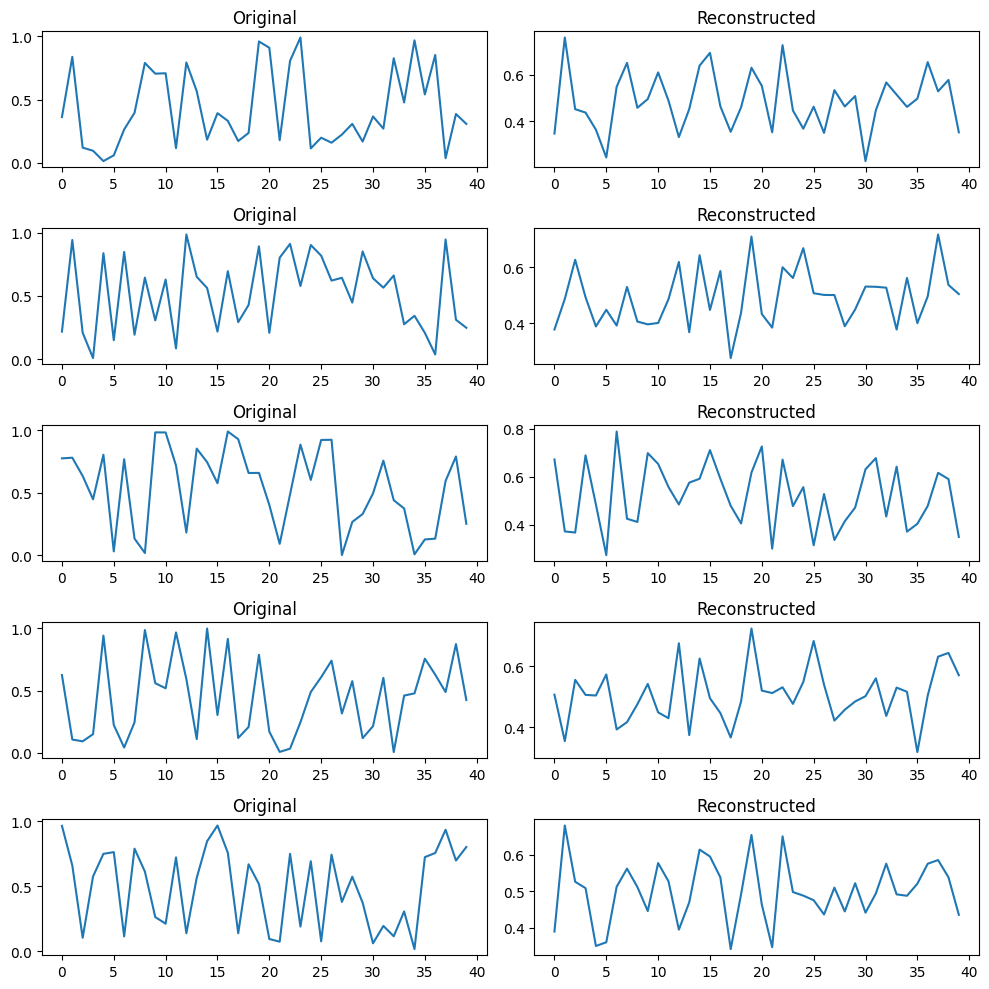

In [6]:
# Get reconstructed data
with torch.no_grad():
    reconstructed = model(lob_tensor).numpy()

# Compare with original data
# Use MSE as the metrics
mse = np.mean((lob_data - reconstructed) ** 2)
print(f'Mean Squared Error: {mse:.4f}')

# Visualization
import matplotlib.pyplot as plt

# Original and reconstructed for a few samples
num_examples = 5
fig, axes = plt.subplots(num_examples, 2, figsize=(10, 10))
for i in range(num_examples):
    axes[i, 0].plot(lob_data[i])
    axes[i, 0].set_title('Original')
    axes[i, 1].plot(reconstructed[i])
    axes[i, 1].set_title('Reconstructed')
plt.tight_layout()
plt.show()
